# Исследование надежности заемщиков

## Описание проекта
Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. 

Входные данные от банка — статистика о платёжеспособности клиентов.


Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

Описание данных:
*	children — количество детей в семье
*	days_employed — общий трудовой стаж в днях
*	dob_years — возраст клиента в годах
*	education — уровень образования клиента
*	education_id — идентификатор уровня образования
*	family_status — семейное положение
*	family_status_id — идентификатор семейного положения
*	gender — пол клиента
*	income_type — тип занятости
*	debt — имел ли задолженность по возврату кредитов
*	total_income — ежемесячный доход
*	purpose — цель получения кредита

### Обзор данных

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
try: 
    df = pd.read_csv('datasets/data.csv')
except FileNotFoundError:
    df = pd.read_csv('/datasets/data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


In [4]:
df.head(10)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


### Заполнение пропусков

В двух столбцах есть пропущенные значения. Один из них — days_employed, второй - total_income. 
Проверим, какую долю составляют пропущенные значения в каждом из столбцов с пропусками.




In [5]:
missed_data_share = 19351 / 21525
print(missed_data_share)

0.8990011614401858


Доля пропусков составляет почти 9%, что может существенно отразиться на результатах исследования. 
Следовательно, необходимо устранить пропуски. 

Начнем со столбца total_income. На размер заработка влияет тип занятости клиента. Например, уровень доходов пенсионеров, женщин в декрете и студентов будет скорее всего ниже, чем у работающих в найме и предринимателей.
Исходя из этого сгруппируем данные по столбцу income_type, найдем медианное значение по столбцу total_income и заменим пропуски на медианные значения в зависимости от типа занятости.

In [6]:
df['total_income'] = df['total_income'].fillna(df.groupby(['income_type'])['total_income'].transform('median'))

Проверим, остались ли пропуски в столбце total_income.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Пропуски в данном столбце устранены.

### Проверка данных на аномалии и исправления

В данных могут встречаться артефакты (аномалии) — значения, которые не отражают действительность и появились по какой-то ошибке. Проверим распределение значений в столбцах days_employed, так как в этом столбце есть пропуски, аномально высокие и отрицательные значения. Причиной может быть человеческий фактор при введение данных. Используем для этого инструмент scatterplot().


<AxesSubplot:xlabel='dob_years', ylabel='days_employed'>

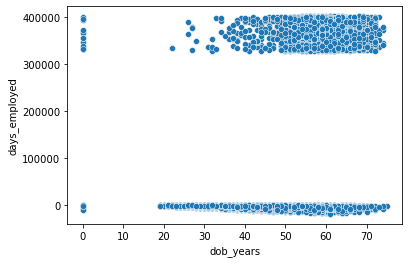

In [8]:
sns.scatterplot(x = 'dob_years', y = 'days_employed', data = df)

На диаграмме видно, что в столбце dob_years присутствуют значения, равные 0. Проверим с помощью функции unique().

In [9]:
df['dob_years'].unique()

array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51,  0, 59, 29, 60, 55, 58, 71, 22, 73,
       66, 69, 19, 72, 70, 74, 75], dtype=int64)

Возраст не может быть равен 0, заменим 0 на медианное значение по данному столбцу. 

In [10]:
df['dob_years'].median()

42.0

In [11]:
df['dob_years'] = df['dob_years'].replace(0, 42)

In [12]:
df['dob_years'].unique()

array([42, 36, 33, 32, 53, 27, 43, 50, 35, 41, 40, 65, 54, 56, 26, 48, 24,
       21, 57, 67, 28, 63, 62, 47, 34, 68, 25, 31, 30, 20, 49, 37, 45, 61,
       64, 44, 52, 46, 23, 38, 39, 51, 59, 29, 60, 55, 58, 71, 22, 73, 66,
       69, 19, 72, 70, 74, 75], dtype=int64)

Далее избавимся от отрицательных значений количества дней трудового стажа в столбце days_employed. С помощью функции abs() приведем все значения в столбце к положительному значению. А затем снова построим диаграмму рассеяния.

<AxesSubplot:xlabel='dob_years', ylabel='days_employed'>

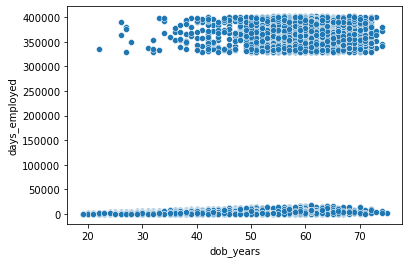

In [13]:
df['days_employed'] = abs(df['days_employed'])

sns.scatterplot(x = 'dob_years', y = 'days_employed', data = df)

Кроме отрицательных значений в столбце days_employed встречаются аномально высокие значения. Данную аномалию также необходимо устранить.
Предположим, что клиент мог начать свою трудовую деятельность с 18 лет. Найдем максимальное количество отработанных дней для клиента с максимальным возрастом.    

In [14]:
print(df['dob_years'].max())

75


Тогда максимально возможное количество отработанных дней равно:

In [15]:
print((75-18)*365)

20805


Предположим, что для всех значений больше этого числа количество отработанных дней было внесено в часах (судя по порядку значений). Поэтому разделим эти аномальные значения на 24.

In [16]:
df['days_employed'] = df['days_employed'].apply(lambda x: x/24 if x > 20805 else x)   

<AxesSubplot:xlabel='dob_years', ylabel='days_employed'>

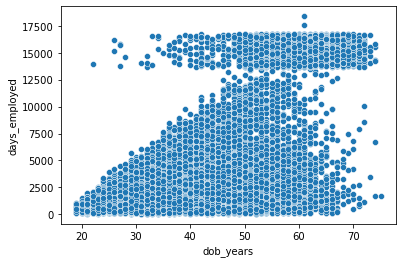

In [17]:
sns.scatterplot(x = 'dob_years', y = 'days_employed', data = df)

Теперь найдем медианное значение по столбцу days_employed и заменим все пропуски на него.

In [18]:
df['days_employed'].median()

2194.220566878695

<AxesSubplot:xlabel='dob_years', ylabel='days_employed'>

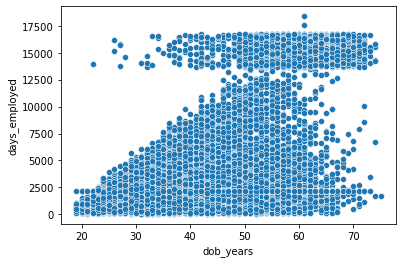

In [19]:
df['days_employed'] = df['days_employed'].fillna(2194.220566878695)
sns.scatterplot(x = 'dob_years', y = 'days_employed', data = df)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Все пропуски устранены.

### Изменение типов данных

Заменим вещественный тип данных в столбце total_income на целочисленный с помощью метода astype().

In [21]:
df['total_income'] = df['total_income'].astype('int')

Проведем проверку:

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  int32  
 11  purpose           21525 non-null  object 
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 1.9+ MB


### Удаление дубликатов

Проверим, присутствуют ли в данных строки-дубликаты. 

In [23]:
df.duplicated().sum()

55

Также обработаем неявные дубликаты в столбцах: children, education, family_status, gender, income_type, purpose  


In [24]:
df['children'].unique()

array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

Очевидно, что количество детей не может быть равно -1, и скорее всего 20. Заменим эти значения на 1 и 2 соответсвенно.

In [25]:
df['children'] = df['children'].replace(-1, 1)
df['children'] = df['children'].replace(20, 2)

Проведем проверку:

In [26]:
df['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

Проведем проверку в столбце education:

In [27]:
df['education'].unique()

array(['высшее', 'среднее', 'Среднее', 'СРЕДНЕЕ', 'ВЫСШЕЕ',
       'неоконченное высшее', 'начальное', 'Высшее',
       'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Неоконченное высшее', 'НАЧАЛЬНОЕ',
       'Начальное', 'Ученая степень', 'УЧЕНАЯ СТЕПЕНЬ', 'ученая степень'],
      dtype=object)

В столбце education есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведем их к одному регистру.

In [28]:
df['education'] = df['education'].str.lower()

Произведем проверку:

In [29]:
df['education'].unique()

array(['высшее', 'среднее', 'неоконченное высшее', 'начальное',
       'ученая степень'], dtype=object)

Дубликаты устранены.
Далее проверим наличие дубликатов в столбце family_status:

In [30]:
df['family_status'].unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

Дубликатов не обнаружено.

In [31]:
df['gender'].unique()

array(['F', 'M', 'XNA'], dtype=object)

Дубликатов не обнаружено.
Далее проверим наличие дубликатов в столбце income_type:

In [32]:
df['income_type'].unique()

array(['сотрудник', 'пенсионер', 'компаньон', 'госслужащий',
       'безработный', 'предприниматель', 'студент', 'в декрете'],
      dtype=object)

Дубликатов не обнаружено.
Далее проверим наличие дубликатов в столбце income_type:

In [33]:
df['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Работать с дубликатами в этом столбце мы будем работать позже.

Теперь удалим все дубликаты.



In [34]:
df = df.drop_duplicates().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21453 entries, 0 to 21452
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21453 non-null  int64  
 1   days_employed     21453 non-null  float64
 2   dob_years         21453 non-null  int64  
 3   education         21453 non-null  object 
 4   education_id      21453 non-null  int64  
 5   family_status     21453 non-null  object 
 6   family_status_id  21453 non-null  int64  
 7   gender            21453 non-null  object 
 8   income_type       21453 non-null  object 
 9   debt              21453 non-null  int64  
 10  total_income      21453 non-null  int32  
 11  purpose           21453 non-null  object 
dtypes: float64(1), int32(1), int64(5), object(5)
memory usage: 1.9+ MB


Итак, для поиска явных дубликатов мы воспользовались функциями duplicated() и drop_duplicates()
Для поиска неявных дубликатов функцией unique(), а для устранения в зависимости от типа выявленного дубликата str.lower() и replace().

Дубликаты чаще всего возникают из-за сбоев при переносе данных, человеского фактора, отсутствии автоматизации при введении данных (например, выпадающий список при выборе назначения кредита).

In [35]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875,покупка жилья
1,1,4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623.422610,33,среднее,1,женат / замужем,0,M,сотрудник,0,145885,покупка жилья
3,3,4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628,дополнительное образование
4,0,14177.753002,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616,сыграть свадьбу


### Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма

Для того, чтобы наши данные занимали меньше памяти и упрощения работы, создадим дополнительные словари для столбцов education и family_status.
Создадим education_dict:

In [36]:
education_dict = df.loc[:,['education','education_id']]
education_dict.head()

,education,education_id
0,высшее,0
1,среднее,1
2,среднее,1
3,среднее,1
4,среднее,1


In [37]:
education_dict.drop_duplicates().reset_index(drop=True)

,education,education_id
0,высшее,0
1,среднее,1
2,неоконченное высшее,2
3,начальное,3
4,ученая степень,4


Создадим словарь family_status_dict:

In [38]:
family_status_dict = df.loc[:,['family_status','family_status_id']]
family_status_dict.head()

,family_status,family_status_id
0,женат / замужем,0
1,женат / замужем,0
2,женат / замужем,0
3,женат / замужем,0
4,гражданский брак,1


In [39]:
family_status_dict = family_status_dict.drop_duplicates().reset_index(drop=True)
display(family_status_dict)

,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,Не женат / не замужем,4


In [40]:
df = df.drop(columns=['family_status', 'education'])
df.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,приобретение автомобиля
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,покупка жилья
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,дополнительное образование
4,0,14177.753002,53,1,1,F,пенсионер,0,158616,сыграть свадьбу


### Категоризация дохода

На основании диапазонов, указанных ниже, создадим столбец total_income_category с категориями:
o	0–30000 — 'E';
o	30001–50000 — 'D';
o	50001–200000 — 'C';
o	200001–1000000 — 'B';
o	1000001 и выше — 'A'.



In [41]:
def income_category(income):
    if income <= 30000:
        return 'E'
    if income <= 50000:
        return 'D'
    if income <= 200000:
        return 'C'
    if income <= 1000000:
        return 'B'
    return 'A'

df['total_income_category'] = df['total_income'].apply(income_category)       

In [42]:
df.head()

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья,B
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,покупка жилья,C
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,дополнительное образование,B
4,0,14177.753002,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C


### Категоризация целей кредита

Далее в целях анализа создадим функцию, которая на основании данных из столбца purpose сформирует новый столбец purpose_category, в который войдут следующие категории: 'операции с автомобилем', 'операции с недвижимостью', 'проведение свадьбы', 'получение образования'.

In [43]:
def purpose_category_func(purpose):
    if 'автомобил' in purpose:
        return 'операции с автомобилем'
    elif 'образован' in purpose:
        return 'получение образования'
    elif 'свадьб' in purpose:
        return 'проведение свадьбы'
    else: return 'операции с недвижимостью'

df['purpose_category'] = df['purpose'].apply(purpose_category_func)


        

In [44]:
df.head(10)

,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,total_income_category,purpose_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,покупка жилья,B,операции с недвижимостью
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,приобретение автомобиля,C,операции с автомобилем
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,покупка жилья,C,операции с недвижимостью
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,дополнительное образование,B,получение образования
4,0,14177.753002,53,1,1,F,пенсионер,0,158616,сыграть свадьбу,C,проведение свадьбы
5,0,926.185831,27,0,1,M,компаньон,0,255763,покупка жилья,B,операции с недвижимостью
6,0,2879.202052,43,0,0,F,компаньон,0,240525,операции с жильем,B,операции с недвижимостью
7,0,152.779569,50,1,0,M,сотрудник,0,135823,образование,C,получение образования
8,2,6929.865299,35,0,1,F,сотрудник,0,95856,на проведение свадьбы,C,проведение свадьбы
9,0,2188.756445,41,1,0,M,сотрудник,0,144425,покупка жилья для семьи,C,операции с недвижимостью


### Ответы на вопросы

#### Вопрос 1:

С помощью сводной таблицы ответим на вопрос: есть ли зависимость между количеством детей и возвратом кредита в срок.

In [45]:
pivot_table_children = df.pivot_table(index = ['children'], columns = 'debt', values = 'total_income', aggfunc = 'count')
pivot_table_children[3] = pivot_table_children[1] / (pivot_table_children[0] + pivot_table_children[1]) *100
display(pivot_table_children)


debt,0,1,3
children,,,
0,13027.0,1063.0,7.544358
1,4410.0,445.0,9.165808
2,1926.0,202.0,9.492481
3,303.0,27.0,8.181818
4,37.0,4.0,9.756098
5,9.0,NaN,NaN


Самый низкий процент невозврата кредита у клиентов без детей, а самый высокий у клиентов с 4 детьми. Интересно, что у клиентов с 5 детьми нет прострочек по кредиту, но таких семей всего 9.
В целом можно утверждать, что у семей с детьми просрочек больше, что может быть связано с наличием значительных расходов на детей.

#### Вопрос 2:

Есть ли зависимость между семейным положением и возвратом кредита в срок?

In [46]:
pivot_table_family_status = df.pivot_table(index = ['family_status_id'], columns = 'debt', values = 'total_income', aggfunc = 'count')
pivot_table_family_status[3] = pivot_table_family_status[1] / (pivot_table_family_status[0] + pivot_table_family_status[1]) * 100
display(pivot_table_family_status)

debt,0,1,3
family_status_id,,,
0,11408,931,7.545182
1,3762,388,9.349398
2,896,63,6.569343
3,1110,85,7.112971
4,2536,274,9.750890


In [47]:
pivot_table_family_status = pivot_table_family_status.merge(family_status_dict, on = 'family_status_id', how = 'left' )
display(pivot_table_family_status)

,family_status_id,0,1,3,family_status
0,0,11408,931,7.545182,женат / замужем
1,1,3762,388,9.349398,гражданский брак
2,2,896,63,6.569343,вдовец / вдова
3,3,1110,85,7.112971,в разводе
4,4,2536,274,9.750890,Не женат / не замужем


Самый низкий процент просрочки платежей у вдовых, а самый высокий у не состоящих в браке или живущих в гражданском браке. Женатые и разведенные показывают примерно одинаковые значения. 

#### Вопрос 3:

Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

In [48]:
pivot_table_income = df.pivot_table(index = ['total_income_category'], columns = 'debt', values = 'total_income', aggfunc = 'count')
pivot_table_income[3] = pivot_table_income[1] / (pivot_table_income[0] + pivot_table_income[1]) * 100
display(pivot_table_income)

debt,0,1,3
total_income_category,,,
A,23,2,8.000000
B,4686,356,7.060690
C,14654,1360,8.492569
D,329,21,6.000000
E,20,2,9.090909


Самый высокий процент невозврата кредита в срок у клиентов с самым низким уровнем дохода. А самый низкий у клиентов с доходом от 30001 до 50000 руб. Люди, зарабатывающие выше 50000 не платят по кредиту в срок в среднем в 7-8 случаях из 100.

#### Вопрос 4:

Как разные цели кредита влияют на его возврат в срок?

In [49]:
pivot_table_purpose = df.pivot_table(index = ['purpose_category'], columns = 'debt', values = 'total_income', aggfunc = 'count')
pivot_table_purpose[3] = pivot_table_purpose[1] / (pivot_table_purpose[0] + pivot_table_purpose[1]) * 100
display(pivot_table_purpose)

debt,0,1,3
purpose_category,,,
операции с автомобилем,3903,403,9.359034
операции с недвижимостью,10029,782,7.233373
получение образования,3643,370,9.220035
проведение свадьбы,2137,186,8.006888


Наибольший процент просрочки выплат по кредиту наблюдается при операциях с автомобилем и получении образования, наименьший - при операциях с недвижимостью и проведении свадьбы. Возможно, это объясняется тем, что покупка недвижимости, как правило, обдуманный шаг, а свадебный кредит закрывается за счет подаренных на свадьбу денег.
В то время, как проценты на потребительские кредиты для проведения операций с автомобилем выше, а получение образования может быть связано с сокращением заработка из-за необходимости тратить время на учебу. 

## Общий вывод:

Цель проведенного исследования: разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Для анализа были использованы данные от банка — статистика о платёжеспособности клиентов.  

В процессе предобработки данных были выявлены пропуски в двух столбцах.  Один из них — total_income, второй -  days_employed. Пропуски в первом столбце мы заполнили медианными значения, предварительно сгруппировав данные по типу занятости, поскольку это влияет на уровень дохода клиента.


В столбце days_employed пропуски заполнили также медианными значениями, предварительно устранив аномалии: отрицательные значения и экстремально высокие значения. 

Кроме того, были обработаны дубликаты в других столбцах с использоанием метода lower() и duplicated(). 

В результате исследования были получены следующие выводы:

1. Самый низкий процент просрочки платежей у вдовых - 6,6%, а самый высокий у не состоящих в браке или живущих в гражданском браке, 9,6% и 9,4% соответственно. Женатые и разведенные показывают примерно одинаковые значения - 7,6% и 7,1%.
2.  Самый низкий процент невозврата кредита у клиентов без детей - 7,5%, а самый высокий у клиентов с 4 детьми - 9,6%. Интересно, что у клиентов с 5 детьми нет прострочек по кредиту, но таких семей мало, всего 9.
В целом можно утверждать, что у семей с детьми просрочек больше, что может быть связано с наличием значительных расходов на детей.
3. Самый высокий процент невозврата кредита в срок у клиентов с самым низким уровнем дохода 9,1%. А самый низкий у клиентов с доходом от 30001 до 50000 руб. - 6%. Люди, зарабатывющие выше 50000 не платят по кредиту в срок в среднем в 7-8 случаях из 100.
4. Наибольший процент просрочки выплат по кредиту наблюдается при операциях с автомобилем и получении образования - 9,4% и 9,2%. Наименьший - при операциях с недвижимостью и проведении свадьбы - 7,2% и 8%. Возможно, это объясняется тем, что покупка недвижимости, как правило, обдуманный шаг, а свадебный кредит закрывается за счет подаренных на свадьбу денег. В то время, как проценты на потребительские кредиты для проведения операций с автомобилем выше, а получение образования может быть связано с сокращением заработка из-за необходимости тратить время на учебу.

Таким образом, портрет наиболее ответственного клиента выглядит следующим образом: человек в браке (или вдовый), без детей, имеющий средний или высокий доход, берущий кредит на операции с недвижимостью.
Клиент, который с более высокой вероятностью задержит возвращения кредита: не состоящий в браке или живущий в гражданском браке, с детьми (особенно с 4), имеющий низкий уровень дохода и берущий кредит на операции с автомобилем или получение образования.





